The Sieve of Eratosthenes inspired this short project. To find the prime numbers up to some arbitrary integer $n$, this sieve simply requires one to eliminate multiples of all integers in the closed interval $[2,n]$. It is easy to see that is sufficient to stop at $\sqrt{n}$. For example, to find the set of prime numbers up to $100$, we can eliminate all composite numbers in $[2,100]$, all of which are multiples of at least one prime $p \leq \sqrt{n}$, which is the set $\{2,3,5,7\}$. This made me interested in the question: which composite numbers "survive" until the last step of the sieve? In this example, the sieve ends upon crossing off multiples of $7$. What would happen if we instead treated $\{2,3,5\}$ as the set of primes less than $\sqrt{n}$. Which composite numbers would we find?

Let's use $p$ to refer to the greatest prime number less than or equal to $n$. I am interested in finding which compositive integers have $p$ as its smallest prime divisor. Note that $m=p^2$ will always be a solution to this sieve. So, we ignore those cases and search for candidate $m$'s that have a squarefree factorization. Let $m = p_1 \cdots p_k$ be the prime factorization of $m$, where $p_i < p_j$ for $i < j$ and $k \geq 2$. Since $p_1$ is the greatest prime $p \leq \sqrt{n}$ we know that $p_2 > \sqrt{n}$ and $p_3 > \sqrt{n}$. Hence $p_2 \cdot p_3 > n$, which means $k=2$. This tells us that we are searching only for semiprime numbers $m=pq$.

We can now reduce the problem to searching for semiprime numbers $m=pq \leq n$ for distinct primes $p,q$ with $p \leq \sqrt{n}$ and $q > \sqrt{n}$. In other words, how many primes $q$ exist in the interval $\big(\sqrt{n}, \frac{n}{p}\big]$? Creech (2023) expanded on foundational work from Noel & Panos (2005), which shows that this count is exactly $\pi\big({\frac{n}{p}}\big) - i$, where $p$ is the $i^{th}$ prime and $\pi$ is the prime counting function.

To continue the above example, choose $n=100$. Then $p=7$ is the greatest prime number less than or equal to $\sqrt{100}=10$. Above, we deduced that we can find solutions to the sieve by searching for primes $q$ where $7 < q \leq \frac{100}{7} \approx 14.3$. Trivially, $q=11$ and $q=13$ are primes satisfying this inequality. This gives the two solutions $m=7\cdot11=77$ and $m=7\cdot13=91$ for $n=100$.

In [1]:
# import libraries

import pandas as pd
import numpy as np

from math import sqrt as sqrt
from math import ceil as ceil
from math import floor as floor

import matplotlib.pyplot as plt

from collections import Counter
from bisect import bisect_left
from bisect import bisect_right
import time
import math

In [2]:
# primality test

def is_prime(n: int) -> bool:
    # returns a Boolean if n is prime or not
    
    ### https://en.wikipedia.org/wiki/Primality_test#Python
    """Primality test using 6k+-1 optimization."""
    if n <= 3:
        return n > 1
    if not n%2 or not n%3:
        return False
    i = 5
    stop = int(n**0.5)
    while i <= stop:
        if not n%i or not n%(i + 2):
            return False
        i += 6
    return True

In [ ]:
def primes_less_than_n(n):
    # returns a list of all prime numbers strictly less than n
    
    if n <= 2:
        return []
    
    is_prime = [True] * n
    is_prime[0] = is_prime[1] = False
    
    for i in range(2, int(n**0.5) + 1):
        if is_prime[i]:
            for multiple in range(i*i, n, i):
                is_prime[multiple] = False
    
    primes = [i for i in range(n) if is_prime[i]]
    return primes

In [169]:
# Calculate now so that we don't have to recalculate in a loop later
primes = primes_less_than_n(10000000)

In [ ]:
def find_prime_index(n):
    # returns 1 for n=2, 2 for n=3, 6 for n=13, etc
    
    if n <= 1:
        return "Not a prime number"
    
    primes = []
    num = 2
    while True:
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
            if num == n:
                return len(primes)
        if len(primes) > n:
            return "Not a prime number"
        num += 1

In [92]:
def pi(x):
    # number of primes <= x
    
    if x<2:
        return 0
    limit = int(sqrt(x))+1
    is_prime = [True]*(x+1)
    is_prime[0] = is_prime[1] = False
    
    for i in range(2, limit):
        if is_prime[i]:
            for j in range(i*i, x+1, i):
                is_prime[j] = False
                
    return sum(is_prime)

In [269]:
def find_greatest_less_than(sorted_list, target):
    # generated via Google generative AI
    
    """
    Finds the greatest number less than the target in a sorted list.

    Args:
        sorted_list: A sorted list of numbers.
        target: The number to compare against.

    Returns:
        The greatest number in the list less than the target, or None if no such number exists.
    """
    low = 0
    high = len(sorted_list) - 1
    result = None

    while low <= high:
        mid = (low + high) // 2
        if sorted_list[mid] < target:
            result = sorted_list[mid]
            low = mid + 1
        else:
            high = mid - 1

    return result

In [305]:
def perl_sieve(n):
    # function that returns a count of the number of solutions to the sieve
    # note that the function does not explicitly find the solutions, though
    
    p_i = find_greatest_less_than(primes, sqrt(n))
    i = find_prime_index(p_i)
    
    # https://arxiv.org/pdf/2310.14989
    return pi(floor(n/p_i))-i

In [291]:
# compute perl_sieve(n) for each n up to max_n

num_solutions = []
max_n = 1000000
for n in range(5, max_n):
    num_solutions.append(perl_sieve(n))
    if (n/max_n*10) in set(range(10)):
        print(f"{n/max_n*100}% done")
    
num_solutions = pd.Series(num_solutions)

10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done


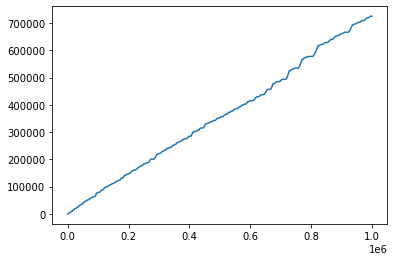

In [292]:
# plot partial sum of perl_sieve(n) for n up to max_n
partial_sums = num_solutions.cumsum()
partial_sums.plot();

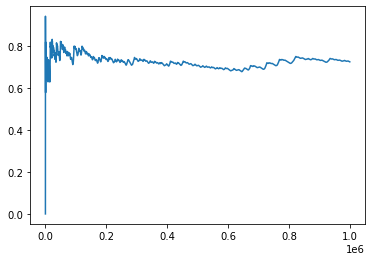

In [293]:
# plot running average
ratios = partial_sums/list(range(5,max_n))
ratios.plot();